In [ ]:
# Code to install packages if they aren't already on your computer
# !pip install python-math
# !pip install numpy
# !pip install matplotlib
# !pip install torch

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST
import torch

In [3]:
train_dataset = MNIST("/content/mnist", download=True, train=True)
test_dataset = MNIST("/content/mnist", download=True, train=False)

(train_images, train_labels) = train_dataset.data.numpy(), train_dataset.targets.numpy()
(test_images, test_labels) = test_dataset.data.numpy(), test_dataset.targets.numpy()

100%|██████████| 9.91M/9.91M [00:00<00:00, 35.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.13MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 9.64MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.50MB/s]


In [4]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


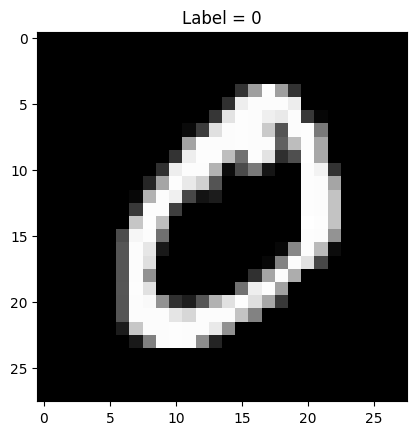

In [5]:
plt.imshow(train_images[1], cmap="gray")
plt.title(f"Label = {train_labels[1]}")
plt.show()

In [6]:
train_data = train_images.reshape([-1, 784, 1]) / 255.0
test_data = test_images.reshape([-1, 784, 1]) / 255.0

In [7]:
train_labels = torch.nn.functional.one_hot(torch.tensor(train_labels), num_classes=10).numpy()
test_labels = torch.nn.functional.one_hot(torch.tensor(test_labels), num_classes=10).numpy()

In [8]:
print(train_labels.shape, test_labels.shape)

(60000, 10) (10000, 10)


In [9]:
def softmax(x):
    """
    Parameters:
        x: shape (B, 10, 1)
    Returns:
        shape (B, 10)
    """
    ex = np.exp(x)
    summed = np.sum(ex, axis=1)
    return ex[:, :, 0] / summed

In [10]:
w = np.random.random([10, 784])
b = np.zeros([10, 1])

In [11]:
def forward(batch, w, b):
    """
    Parameters:
        batch: shape (B, 784, 1)
        w: shape (10, 784)
        b: shape (10, 1)
    Returns:
        p: shape (B, 10)
    """
    a = w @ batch + b
    p = softmax(a)
    return p

In [12]:
def gradients(batch_data, batch_labels, w, b):
    """
    Parameters:
        batch_data: shape (B, 784, 1)
        batch_labels: shape (B, 10)
        w: shape (10, 784)
        b: shape (10, 1)
    Returns:
        dw: shape (10, 784)
        db: shape (10, 1)
    """
    a = w @ batch_data + b
    p = softmax(a)
    da = batch_labels * (p - 1) # (B, 10) (B, 784, 1)
    dw = da[:, :, np.newaxis] * batch_data[:, np.newaxis, :, 0]
    dw = np.mean(dw, axis=0)
    db = da
    db = np.mean(db, axis=0)[:, np.newaxis]
    return dw, db

In [13]:
def loss(batch_labels, batch_preds):
    """
    Parameters:
        batch_labels: shape (B, 10)
        batch_preds: shape (B, 10)
    Returns:
        scalar
    """
    return np.sum(-batch_labels*np.log(batch_preds))

In [14]:
def evaluate(w, b):
    """
    Parameters:
        w: shape (10, 784)
        b: shape (10, 1)
    Returns:
        scalar
    """
    all_batch_preds = []
    all_batch_labels = []
    for i in range(10):
        batch_data = test_data[1000*i:1000*(i+1)]
        batch_labels = test_labels[1000*i:1000*(i+1)]
        batch_preds = forward(batch_data, w, b)
        batch_preds = np.argmax(batch_preds, axis=1)
        batch_preds = torch.nn.functional.one_hot(torch.tensor(batch_preds.astype(np.int64)), num_classes=10).numpy()
        all_batch_preds.append(batch_preds)
        all_batch_labels.append(batch_labels)
    all_batch_preds = np.concatenate(all_batch_preds, axis=0)
    all_batch_labels = np.concatenate(all_batch_labels, axis=0)
    return np.sum(all_batch_preds * all_batch_labels) / 10000

In [15]:
learning_rate = 0.1
epochs = 50
all_losses = []
all_evaluations = []

In [16]:
for epoch in range(epochs):
    learning_rate *= 0.95
    loss_sum = 0
    for i in range(60):
        batch_data = train_data[1000*i:1000*(i+1)]
        batch_labels = train_labels[1000*i:1000*(i+1)]
        dw, db = gradients(batch_data, batch_labels, w, b)
        batch_preds = forward(batch_data, w, b)
        loss_sum += loss(batch_labels, batch_preds)
        if i == 59:
            all_losses.append(loss_sum/60)
            print(f"epoch {epoch} step {i} loss {loss_sum / (i + 1)}")
            evaluation_result = evaluate(w, b)
            all_evaluations.append(evaluation_result)
            print(f"evaluate {evaluation_result}")
        w = w - learning_rate * dw
        b = b - learning_rate * db

epoch 0 step 59 loss 2602.176823725441
evaluate 0.5442
epoch 1 step 59 loss 1153.2418429240147
evaluate 0.6866
epoch 2 step 59 loss 918.6678521095624
evaluate 0.7387
epoch 3 step 59 loss 824.9700198960664
evaluate 0.7694
epoch 4 step 59 loss 777.3034878176942
evaluate 0.7876
epoch 5 step 59 loss 750.2473218923185
evaluate 0.7995
epoch 6 step 59 loss 734.0753098088514
evaluate 0.8089
epoch 7 step 59 loss 724.2640562496528
evaluate 0.8169
epoch 8 step 59 loss 718.4212696302169
evaluate 0.8232
epoch 9 step 59 loss 715.1659308601179
evaluate 0.8274
epoch 10 step 59 loss 713.6497698327664
evaluate 0.8313
epoch 11 step 59 loss 713.3270147396088
evaluate 0.8337
epoch 12 step 59 loss 713.8335884309842
evaluate 0.8364
epoch 13 step 59 loss 714.9195087716772
evaluate 0.8387
epoch 14 step 59 loss 716.409100610306
evaluate 0.8402
epoch 15 step 59 loss 718.1765829315958
evaluate 0.8421
epoch 16 step 59 loss 720.130551882226
evaluate 0.8429
epoch 17 step 59 loss 722.2038140611385
evaluate 0.844
epoc

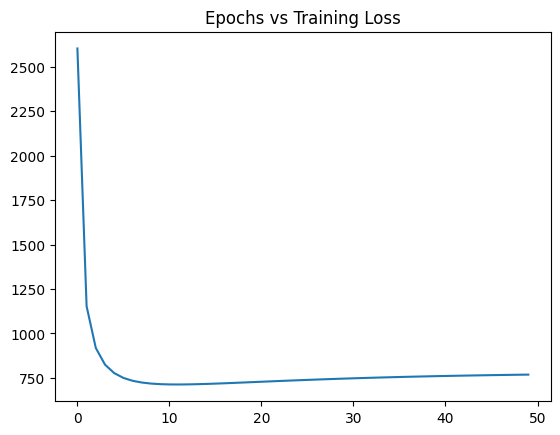

In [17]:
plt.plot([i for i in range(50)], all_losses)
plt.title("Epochs vs Training Loss")
plt.show()

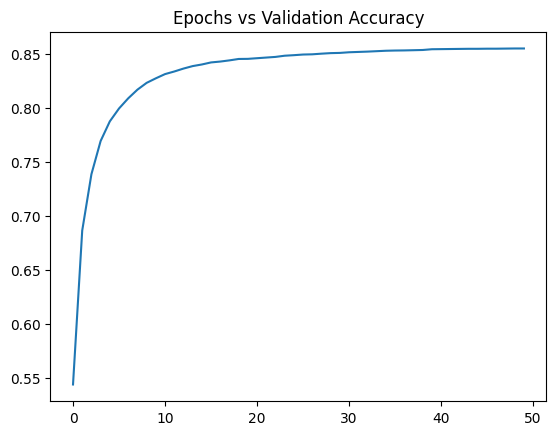

In [18]:
plt.plot([i for i in range(50)], all_evaluations)
plt.title("Epochs vs Validation Accuracy")
plt.show()

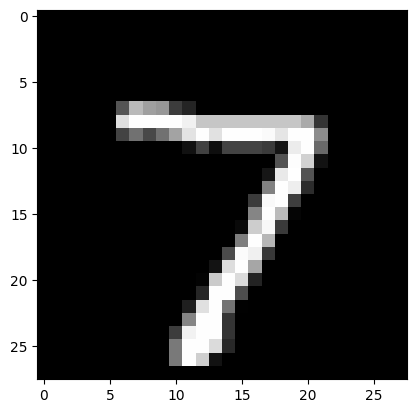

Predicted: 7
Actual: 7


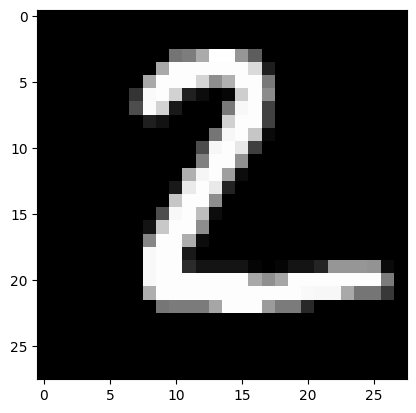

Predicted: 2
Actual: 2


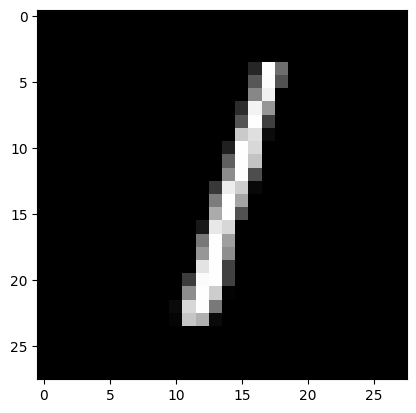

Predicted: 1
Actual: 1


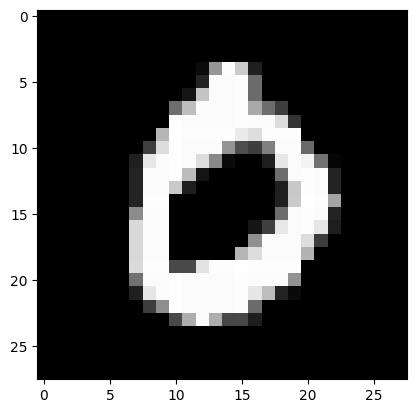

Predicted: 0
Actual: 0


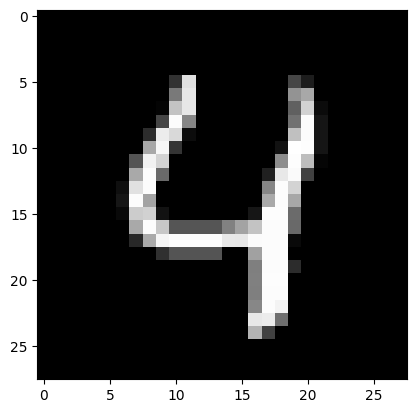

Predicted: 4
Actual: 4


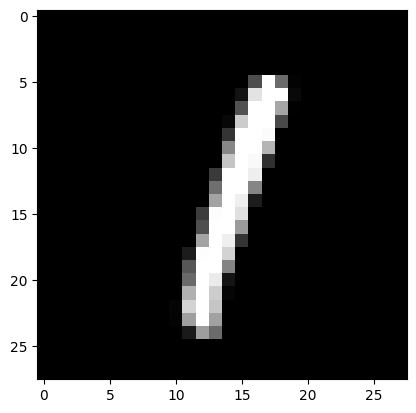

Predicted: 1
Actual: 1


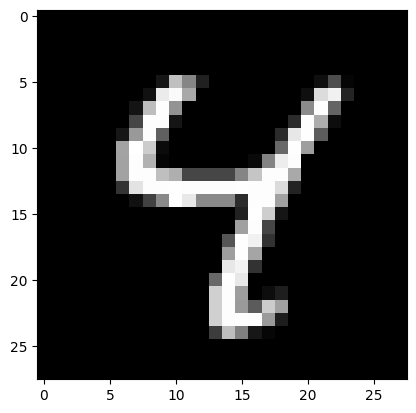

Predicted: 4
Actual: 4


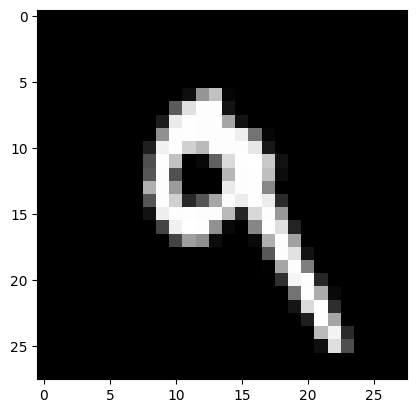

Predicted: 9
Actual: 9


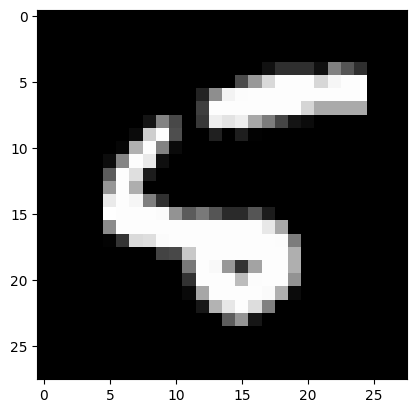

Predicted: 6
Actual: 5


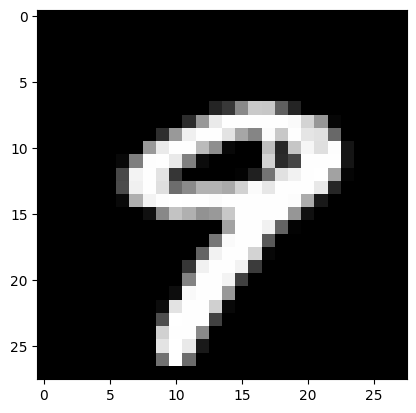

Predicted: 9
Actual: 9


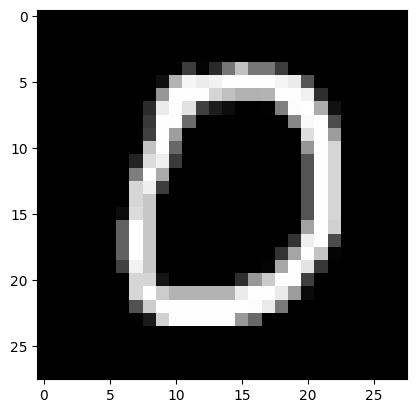

Predicted: 0
Actual: 0


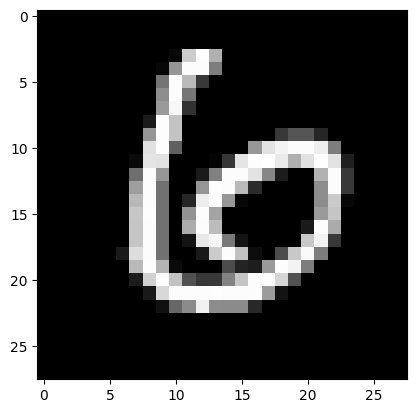

Predicted: 2
Actual: 6


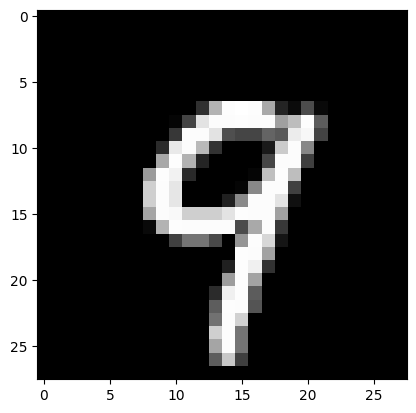

Predicted: 9
Actual: 9


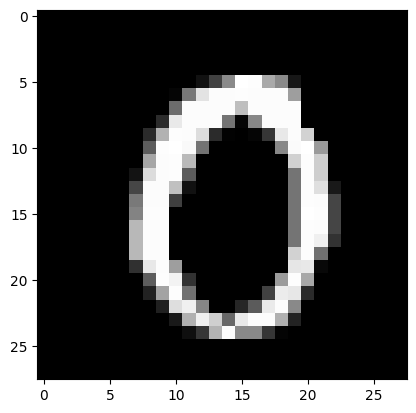

Predicted: 0
Actual: 0


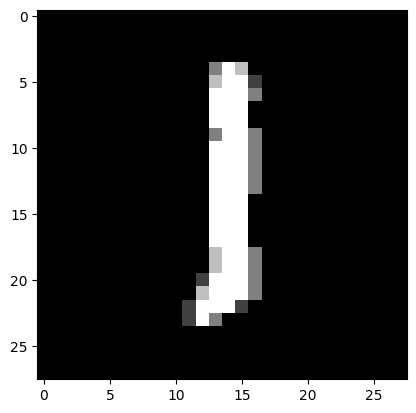

Predicted: 1
Actual: 1


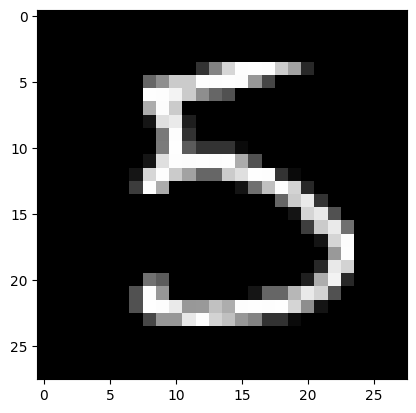

Predicted: 5
Actual: 5


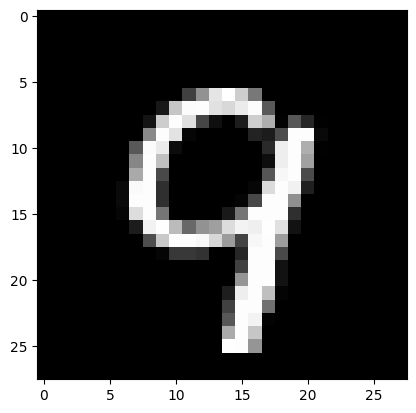

Predicted: 9
Actual: 9


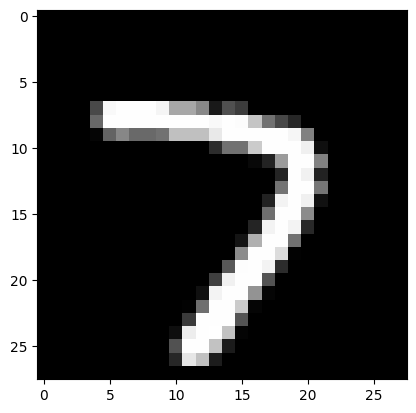

Predicted: 7
Actual: 7


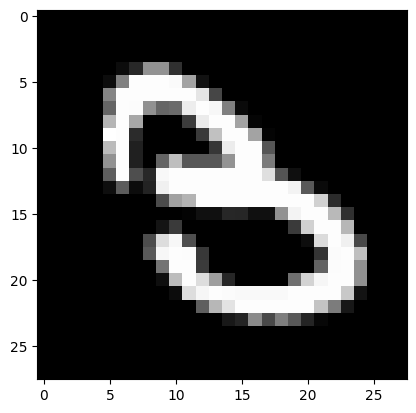

Predicted: 3
Actual: 3


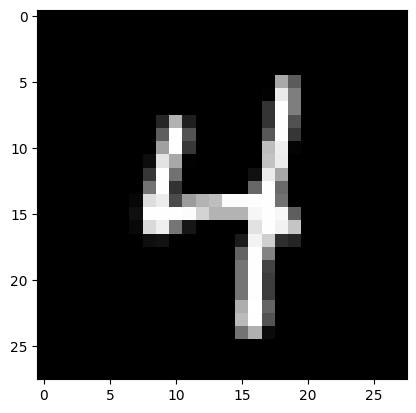

Predicted: 4
Actual: 4


In [19]:
for i in range(20):
    curr_data = test_data[i:i+1]
    curr_label = np.argmax(test_labels[i:i+1])
    plt.imshow(test_images[i], cmap="gray")
    plt.show()
    prob = forward(curr_data, w, b)[0]
    pred = np.argmax(prob)
    print(f"Predicted: {pred}")
    print(f"Actual: {curr_label}")

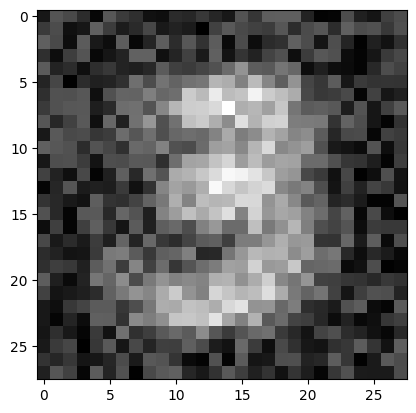

In [20]:
plt.imshow(w[3].reshape([28, 28]), cmap="gray")
plt.show()